<a id=top-page></a>
# Kernel regression

***

In [1]:
%run -i imports.py
%matplotlib inline

numpy==1.21.6
pandas==1.3.5
PCAfold==2.0.0
scipy==1.7.3


### Select one dataset:

In [2]:
data_tag = 'H2-air'
# data_tag = 'CO-H2-air'
# data_tag = 'CH4-air'
# data_tag = 'C2H4-air'

In [3]:
########################################################################
## Load data - Hydrogen/air flamelet
########################################################################

if data_tag == 'H2-air':
    
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-2]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-2]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-2]

    selected_state_variables = [0, 2, 4, 5, 6, 8]

########################################################################
## Load data - Syngas/air flamelet
########################################################################

if data_tag == 'CO-H2-air':
    
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    (n_observations, n_variables) = np.shape(state_space)

    print('\nThe data set has ' + str(n_observations) + ' observations.')
    print('\nThe data set has ' + str(n_variables) + ' variables.')

    selected_state_variables = [0, 1, 2, 4, 5, 8, 9]

########################################################################
## Load data - Methane/air flamelet
########################################################################

if data_tag == 'CH4-air':
   
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    species_to_remove = 'N2'
    (species_index, ) = np.where(state_space_names==species_to_remove)
    state_space = np.delete(state_space, np.s_[species_index], axis=1)
    state_space_sources = np.delete(state_space_sources, np.s_[species_index], axis=1)
    state_space_names = np.delete(state_space_names, np.s_[species_index])

    selected_state_variables = [0, 4, 5, 6, 14, 16]

########################################################################
## Load data - Ethylene/air flamelet
########################################################################

if data_tag == 'C2H4-air':
   
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    selected_state_variables = [0, 4, 5, 6, 15, 22]

(n_observations, n_variables) = np.shape(state_space)

print('\nThe data set has ' + str(n_observations) + ' observations.')
print('\nThe data set has ' + str(n_variables) + ' variables.')

state_space_names[selected_state_variables]


The data set has 58101 observations.

The data set has 9 variables.


array(['T', 'H2', 'OH', 'H2O', 'O2', 'H2O2'], dtype=object)

In [4]:
color_map_colors = cmc.batlow
cluster_colors = color_map_colors(np.linspace(0, 1, 10))

In [5]:
n_components = 2
random_seeds_list = [i for i in range(0,100)]
power = 4
vertical_shift = 1
if n_components == 2: decoder_architecture = (6,9,10)
if n_components == 3: decoder_architecture = (7,10,11)
penalty_function = 'log-sigma-over-peak'
train_perc = 80
n_neighbors = 100
random_seeds_combined = np.vstack((random_seeds_list, random_seeds_list)).ravel()

In [6]:
learning_rate = 0.001
batch_size = n_observations
n_epochs = 20000
case_name = str(n_components) + 'D-LDM-lr-' + str(learning_rate) + '-bs-' + str(batch_size) + '-n-epochs-' + str(n_epochs) + '-architecture'
print(case_name)

2D-LDM-lr-0.001-bs-58101-n-epochs-20000-architecture


In [7]:
architecture_without = str(n_variables) + '-' + str(n_components) + '-' + '-'.join([str(i) for i in decoder_architecture]) + '-' + str(len(selected_state_variables))
architecture_with = str(n_variables) + '-' + str(n_components) + '-' + '-'.join([str(i) for i in decoder_architecture]) + '-' + str(len(selected_state_variables) + n_components*2)

In [8]:
verbose = False

In [9]:
# costs_without_Seta_1 = []
# costs_without_Seta_2 = []
# costs_without_Seta_3 = []
# costs_with_Seta_1 = []
# costs_with_Seta_2 = []
# costs_with_Seta_3 = []

# for random_seed in random_seeds_list:
    
#     if verbose: print('Random seed: ' + str(random_seed) + '...\n')

#     # Without Seta: - - - - - - - - - - - - - - - - - - - - - - - - - -
    
#     variance_data_without = pickle.load(open('../results/QoIAwareProjection-VarianceData-without-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_without + '-random-seed-' + str(random_seed) + '.pkl', 'rb'))

#     costs_without = analysis.cost_function_normalized_variance_derivative(variance_data_without,
#                                                                         penalty_function=penalty_function,
#                                                                         norm=None,
#                                                                         power=power,
#                                                                         vertical_shift=vertical_shift,
#                                                                         integrate_to_peak=False)

#     # With Seta: - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
#     variance_data_with = pickle.load(open('../results/QoIAwareProjection-VarianceData-with-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_with + '-random-seed-' + str(random_seed) + '.pkl', 'rb'))
    
#     costs_with = analysis.cost_function_normalized_variance_derivative(variance_data_with,
#                                                                   penalty_function=penalty_function,
#                                                                   norm=None,
#                                                                   power=power,
#                                                                   vertical_shift=vertical_shift,
#                                                                   integrate_to_peak=False)

#     # Upload the current cost statistics: - - - - - - - - - - - - - - -

#     costs_without_Seta_1.append(costs_without[0])
#     costs_without_Seta_2.append(costs_without[1])
#     costs_without_Seta_3.append(costs_without[2])
    
#     costs_with_Seta_1.append(costs_with[0])
#     costs_with_Seta_2.append(costs_with[1])
#     costs_with_Seta_3.append(costs_with[2])

In [10]:
# if n_components == 2:

#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-1-without-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_without_Seta_1), delimiter=',', fmt='%.16e')
#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-2-without-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_without_Seta_2), delimiter=',', fmt='%.16e')
    
#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-1-with-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_with_Seta_1), delimiter=',', fmt='%.16e')
#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-2-with-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_with_Seta_2), delimiter=',', fmt='%.16e')
    
# if n_components == 3:

#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-1-without-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_without_Seta_1), delimiter=',', fmt='%.16e')
#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-2-without-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_without_Seta_2), delimiter=',', fmt='%.16e')
#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-3-without-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_without_Seta_3), delimiter=',', fmt='%.16e')
    
#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-1-with-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_with_Seta_1), delimiter=',', fmt='%.16e')
#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-2-with-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_with_Seta_2), delimiter=',', fmt='%.16e')
#     np.savetxt('../results/' + data_tag + '-SLF-cost-Seta-3-with-Seta-' + str(n_components) + 'D-LDM.csv', np.array(costs_with_Seta_3), delimiter=',', fmt='%.16e')

***

## Plot results

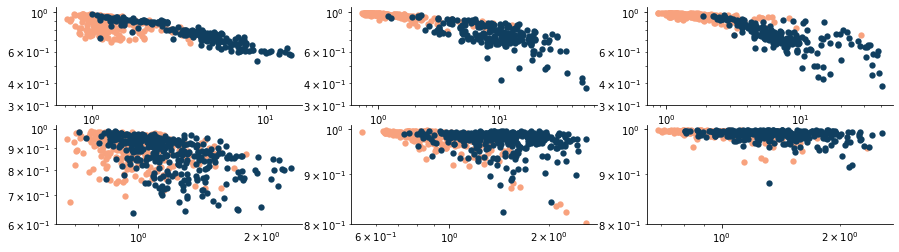

In [11]:
s = 40
fig = plt.figure(figsize=(15,4))
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=[1, 1, 1], height_ratios=[1,1])

for n_components in [2,3]:

    for j, data_tag in enumerate(['H2-air', 'CH4-air', 'C2H4-air']):
        
        # Upload data to plot: - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
        
        costs_without_Seta_1 = pd.read_csv('../results/' + data_tag + '-SLF-cost-Seta-1-without-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
        costs_without_Seta_2 = pd.read_csv('../results/' + data_tag + '-SLF-cost-Seta-2-without-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()

        costs_with_Seta_1 = pd.read_csv('../results/' + data_tag + '-SLF-cost-Seta-1-with-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
        costs_with_Seta_2 = pd.read_csv('../results/' + data_tag + '-SLF-cost-Seta-2-with-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()

        NRMSE_Seta_1_with = pd.read_csv('../results/' + data_tag + '-SLF-NRMSE-Seta-1-with-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
        NRMSE_Seta_2_with = pd.read_csv('../results/' + data_tag + '-SLF-NRMSE-Seta-2-with-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
        NRMSE_Seta_1_without = pd.read_csv('../results/' + data_tag + '-SLF-NRMSE-Seta-1-without-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
        NRMSE_Seta_2_without = pd.read_csv('../results/' + data_tag + '-SLF-NRMSE-Seta-2-without-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()

        R2_Seta_1_with = pd.read_csv('../results/' + data_tag + '-SLF-R2-Seta-1-with-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
        R2_Seta_2_with = pd.read_csv('../results/' + data_tag + '-SLF-R2-Seta-2-with-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
        R2_Seta_1_without = pd.read_csv('../results/' + data_tag + '-SLF-R2-Seta-1-without-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
        R2_Seta_2_without = pd.read_csv('../results/' + data_tag + '-SLF-R2-Seta-2-without-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()

        if n_components == 3:

            costs_without_Seta_3 = pd.read_csv('../results/' + data_tag + '-SLF-cost-Seta-3-without-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
            costs_with_Seta_3 = pd.read_csv('../results/' + data_tag + '-SLF-cost-Seta-3-with-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()

            NRMSE_Seta_3_with = pd.read_csv('../results/' + data_tag + '-SLF-NRMSE-Seta-3-with-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
            NRMSE_Seta_3_without = pd.read_csv('../results/' + data_tag + '-SLF-NRMSE-Seta-3-without-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()

            R2_Seta_3_with = pd.read_csv('../results/' + data_tag + '-SLF-R2-Seta-3-with-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()
            R2_Seta_3_without = pd.read_csv('../results/' + data_tag + '-SLF-R2-Seta-3-without-Seta-' + str(n_components) + 'D-LDM.csv', sep = ',', header=None).to_numpy()

        # Plot current data: - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
        
        figure = fig.add_subplot(spec[n_components-2,j])
        plt.scatter(costs_with_Seta_1, R2_Seta_1_with, s=s, c=cluster_colors[7].reshape(1,-1), linewidth=0)
        plt.scatter(costs_with_Seta_2, R2_Seta_2_with, s=s, c=cluster_colors[7].reshape(1,-1), linewidth=0)
        if n_components == 3: plt.scatter(costs_with_Seta_3, R2_Seta_3_with, s=s, c=cluster_colors[7].reshape(1,-1), linewidth=0)

        plt.scatter(costs_without_Seta_1, R2_Seta_1_without, s=s, c=cluster_colors[1].reshape(1,-1), alpha=1, linewidth=0)
        plt.scatter(costs_without_Seta_2, R2_Seta_2_without, s=s, c=cluster_colors[1].reshape(1,-1), alpha=1, linewidth=0)
        if n_components == 3: plt.scatter(costs_without_Seta_3, R2_Seta_3_without, s=s, color=cluster_colors[1].reshape(1,-1), alpha=1, linewidth=0)

        if n_components == 2: plt.ylim([0.3,1.08])
        if n_components == 3: plt.ylim([0.6,1.02])
            
        if n_components == 3:
            if j>0:
                plt.ylim([0.8,1.01])
            
        plt.xscale('log')
        plt.yscale('log')
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

plt.savefig('../figures/kernel-regression.svg', dpi=300, bbox_inches='tight')

***